**Statistical Models for time series forecasting : ARIMA / SARIMA / FOURRIER TRANSFORMATION / EXPONENTIAL SMOOTHING**

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA


In [9]:
dta = sm.datasets.sunspots.load_pandas().data

<Axes: >

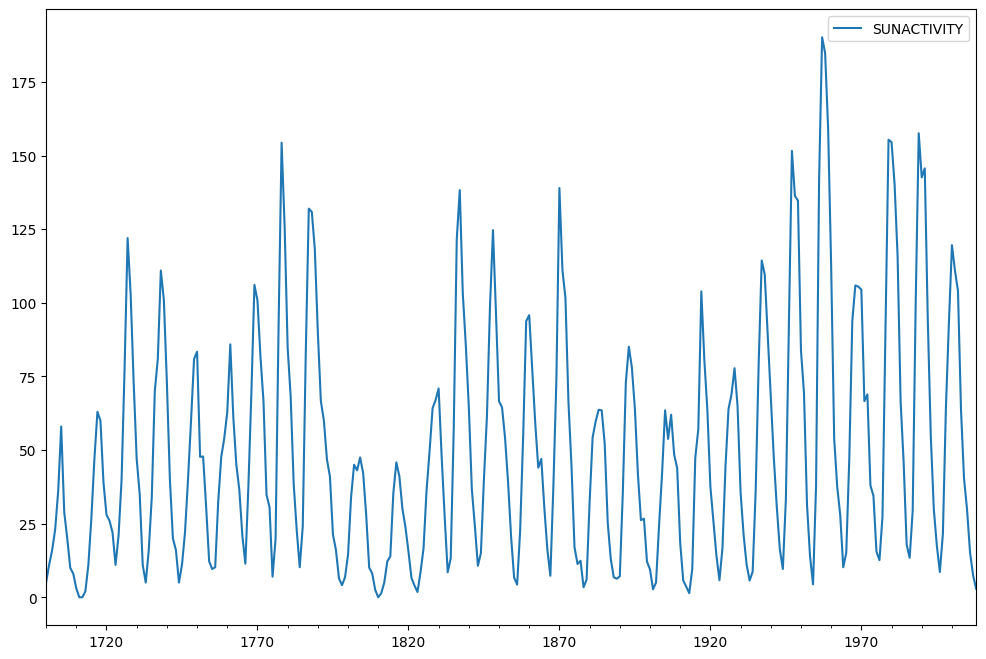

In [6]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
dta.index.freq = dta.index.inferred_freq
del dta["YEAR"]
dta.plot(figsize=(12, 8))

In [7]:
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()  # order = (p, d, q)
print(arma_mod20.params)

const      49.746198
ar.L1       1.390633
ar.L2      -0.688573
sigma2    274.727181
dtype: float64


In [10]:
data= pd.read_csv('./datasets/passenger.csv')
del data['Month']
#split data into train and test
train= data[:int(0.8*(len(data)))]
test= data[int(0.8*(len(data))):]

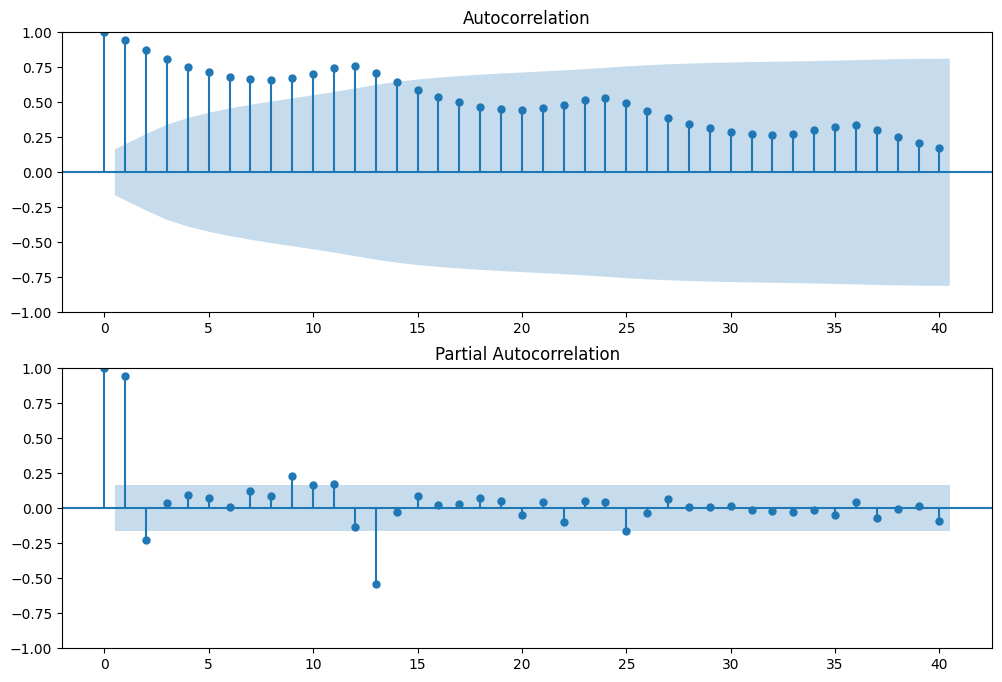

In [11]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data, lags=40, ax=ax2)


In [22]:
arima_test= ARIMA(train['Passengers'], order=(12,1,12)).fit()
print(arima_test.params)

/home/lost-elf/Desktop/KIAN/time-series-forecasting/env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/lost-elf/Desktop/KIAN/time-series-forecasting/env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ar.L1      0.110680
ar.L2     -0.118563
ar.L3      0.125049
ar.L4     -0.103624
ar.L5      0.096280
ar.L6     -0.093698
ar.L7      0.046433
ar.L8     -0.088855
ar.L9      0.032330
ar.L10    -0.086878
ar.L11     0.077355
ar.L12     0.860073
ma.L1     -0.229456
ma.L2      0.082680
ma.L3     -0.268280
ma.L4     -0.111505
ma.L5      0.073047
ma.L6     -0.040300
ma.L7     -0.011764
ma.L8     -0.134766
ma.L9      0.096334
ma.L10    -0.098884
ma.L11     0.223457
ma.L12    -0.220452
sigma2    67.641182
dtype: float64


/home/lost-elf/Desktop/KIAN/time-series-forecasting/env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
# predict the values
predicted=arima_test.forecast(steps=len(test))
real_values= data['Passengers'][int(0.8*(len(data))):]

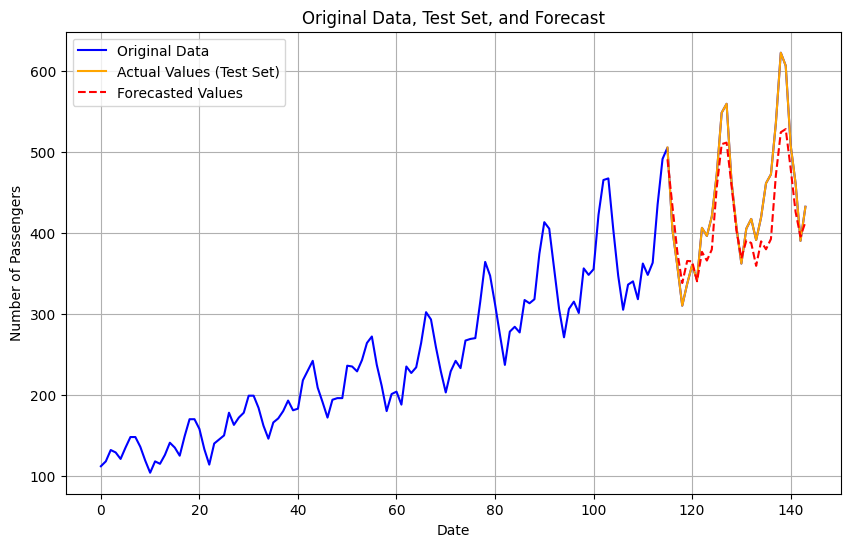

In [24]:
forecast_index = data['Passengers'].index[len(train):len(train)+len(test)+1]  # Adjust if the steps exceed 20 months
forecast_values = predicted

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Passengers"], label="Original Data", color="blue")

# Plot the actual test data
plt.plot(test.index, test.values, label="Actual Values (Test Set)", color="orange")

# Plot the forecasted values
plt.plot(forecast_index, forecast_values, label="Forecasted Values", color="red", linestyle="dashed")

# Add title, legend, and labels
plt.title("Original Data, Test Set, and Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid()
plt.show()

**Method to automatically find optimal P,Q,D**

In [3]:
import  pmdarima import AutoARIMA

# Fit ARIMA automatically
auto_arima_model = AutoARIMA(
    train['Passengers'],
    start_p=0, max_p=10,
    start_q=0, max_q=10,
    d=None,       # Let the algorithm determine 'd'
    seasonal=True,  # Set to True if you have seasonal data
    trace=True,    # Print progress
    error_action="ignore",  # Ignore non-converging models
    suppress_warnings=True,
    stepwise=True  # Use stepwise search to reduce computation
)

print(auto_arima_model.summary())


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

**SARIMA**